Basis functions

In [1]:
import os
import shapely
import datetime
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
grid_gdf = gpd.read_file("grid_pts_coarse.shp")

<Axes: >

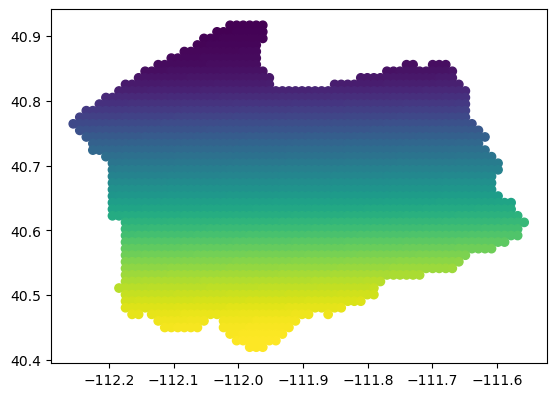

In [3]:
grid_gdf.plot(column = "rstr_c_")

In [4]:
grid_crds = grid_gdf.get_coordinates()
min_x = grid_crds.x.min()
max_x = grid_crds.x.max()
min_y = grid_crds.y.min()
max_y = grid_crds.y.max()
print(min_x, max_x, min_y, max_y)

-112.25516635714284 -111.55831564285714 40.419293290000006 40.916769710000004


In [5]:
grid_crds['normalized_lon'] = (grid_crds['x']-min_x)/(max_x - min_x)
grid_crds['normalized_lat'] = (grid_crds['y']-min_y)/(max_y-min_y)

## Stationary monitor data

In [18]:
# aq_df = pd.read_csv("data/ozone_data.csv")
aq_df = pd.read_csv('/Users/brenna/Documents/School/Research/ebus_air/ebus-air/data/aqs/aqs_o3_v4.csv')
aq_df.head()

,site.num,latitude,longitude,parameter.name,day_time,date,hour,sample.measurement
0,2005,40.598056,-111.894167,Ozone,2018-12-14 00:00:00,2018-12-14,0,0.000
1,2005,40.598056,-111.894167,Ozone,2018-12-14 01:00:00,2018-12-14,1,0.000
2,2005,40.598056,-111.894167,Ozone,2018-12-14 02:00:00,2018-12-14,2,0.000
3,2005,40.598056,-111.894167,Ozone,2018-12-14 03:00:00,2018-12-14,3,0.000
4,2005,40.598056,-111.894167,Ozone,2018-12-14 05:00:00,2018-12-14,5,0.000
...,...,...,...,...,...,...,...,...
382487,4002,40.662961,-111.901851,Ozone,2024-09-30 19:00:00,2024-09-30,19,0.039
382488,4002,40.662961,-111.901851,Ozone,2024-09-30 20:00:00,2024-09-30,20,0.026
382489,4002,40.662961,-111.901851,Ozone,2024-09-30 21:00:00,2024-09-30,21,0.015
382490,4002,40.662961,-111.901851,Ozone,2024-09-30 22:00:00,2024-09-30,22,0.011


In [19]:
aq_df['day_time'] = pd.to_datetime(aq_df['day_time'], format='mixed')
# add the timezone:
aq_df['day_time'] = aq_df['day_time'] + pd.Timedelta(hours=7)

print(aq_df['day_time'][0:10])
print(aq_df['day_time'].dtype)

0   2018-12-14 07:00:00
1   2018-12-14 08:00:00
2   2018-12-14 09:00:00
3   2018-12-14 10:00:00
4   2018-12-14 12:00:00
5   2018-12-14 13:00:00
6   2018-12-14 14:00:00
7   2018-12-14 15:00:00
8   2018-12-14 16:00:00
9   2018-12-14 17:00:00
Name: day_time, dtype: datetime64[ns]
datetime64[ns]


In [20]:
# aq_df = aq_df[(aq_df.day_time >= "2023-07-07") & (aq_df.day_time <= "2023-07-21")]
aq_df = aq_df[(aq_df.day_time >= "2023-01-01") & (aq_df.day_time <= "2023-12-31")]

In [21]:
lon = aq_df.values[:,2].astype('float64')
lat = aq_df.values[:,1].astype('float64')
aq_df['normalized_lon'] = (lon-min_x)/(max_x - min_x)
aq_df['normalized_lat'] = (lat-min_y)/(max_y-min_y)
N = lon.shape[0]

/var/folders/75/b6cym0892z93rs6dbfy789240000gn/T/ipykernel_53101/51930061.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq_df['normalized_lon'] = (lon-min_x)/(max_x - min_x)
/var/folders/75/b6cym0892z93rs6dbfy789240000gn/T/ipykernel_53101/51930061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq_df['normalized_lat'] = (lat-min_y)/(max_y-min_y)


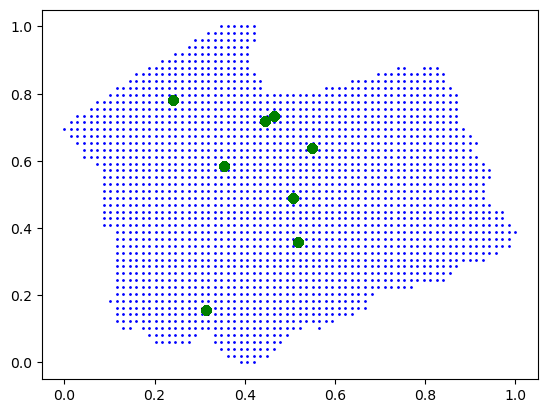

In [22]:
plt.plot(grid_crds['normalized_lon'], grid_crds['normalized_lat'], 'bo', markersize=1)
plt.plot(aq_df['normalized_lon'], aq_df['normalized_lat'], 'go')
plt.show()

## Standarizing time

In [23]:
aq_df.head()

day_time = aq_df['day_time'].astype('int64') / 1e9 ## Time in nanoseconds

min_t = day_time.min()
max_t = day_time.max()
print(min_t, max_t)

aq_df['normalized_time'] = (day_time - min_t) / (max_t-min_t)
aq_df['normalized_time']


1672531200.0 1703980800.0


/var/folders/75/b6cym0892z93rs6dbfy789240000gn/T/ipykernel_53101/1457317794.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq_df['normalized_time'] = (day_time - min_t) / (max_t-min_t)


198333    0.000000
198334    0.000114
198335    0.000229
198336    0.000343
198337    0.000458
            ...   
323402    0.999542
323403    0.999657
323404    0.999771
323405    0.999886
323406    1.000000
Name: normalized_time, Length: 69095, dtype: float64

## mobile data

In [ ]:
# ebus = pd.read_csv("data/ebus_min_2023_07.csv", header = [0,1],
#                    na_values = -9999.00) # note: -9999.00 isn't a value in level 2 mobile data
# print(ebus.head())
# print(ebus.shape)

# trax = pd.read_csv("data/trx_min_2023_07.csv", header = [0, 1],
#                    na_values = -9999.00)
# trax.head()
# trax.shape

                 times       LAT        LON     ELV ROW COL   GSP    SP    TT  \
   2023-07-01 00:00:00  40.76355 -111.90943  1293.4  63  58   0.0   0.0  29.6   
0  2023-07-01 00:00:00  40.70350 -111.97723  1293.9  51  45   0.0   0.0  29.5   
1  2023-07-01 00:00:00  40.69294 -111.96915  1303.8  49  46  13.5  13.4  31.1   
2  2023-07-01 00:00:00  40.69298 -111.96718  1301.2  49  47   1.3   1.0  31.1   
3  2023-07-01 00:01:00  40.70347 -111.97723  1293.9  51  45   3.6   0.8  29.6   
4  2023-07-01 00:01:00  40.69294 -111.97194  1303.3  49  46  11.6  12.5  31.1   

    TRH                 PM1 PM2.5                 PM4                PM10  \
   17.6 Unnamed: 10_level_1   2.0 Unnamed: 12_level_1 Unnamed: 13_level_1   
0  18.7                 NaN   NaN                 NaN                 NaN   
1  16.9                 NaN   2.0                 NaN                 NaN   
2  16.7                 NaN   2.0                 NaN                 NaN   
3  18.7                 NaN   NaN              

(93463, 16)

In [ ]:
# ebus = pd.DataFrame({
#     'time': pd.to_datetime(ebus.iloc[:,0]),
#     'lon': ebus.iloc[:,2],
#     'lat': ebus.iloc[:,1],
#     'o3': ebus.iloc[:,15]
#     })
# trax = pd.DataFrame({
#     'time': pd.to_datetime(trax.iloc[:,0]),
#     'lon': trax.iloc[:,2],
#     'lat': trax.iloc[:,1],
#     'o3': trax.iloc[:,15]
#     })

# trax[trax.o3 == 0].count()
# ebus[ebus.o3 == 0].count()

# trax = trax[trax.o3 != 0] # no pm25 observations should be zero

In [39]:
# mobile = ebus 
#pd.concat([ebus, trax])
# mobile.shape

mobile = pd.read_csv("/Users/brenna/Documents/School/Research/ebus_air/ebus-air/data/mobile/mobile_o3_clean.csv", # header = [0,1],  
                 na_values = -9999.00)
# mobile.shape
mobile.head()

,times,LAT,LON,ELV,O3,O3F,ebus_trax
0,2021-09-28 16:49:00,40.76616,-111.84761,1475.8,33.2,0,ebus
1,2021-09-28 16:50:00,40.76618,-111.84762,1475.7,33.3,0,ebus
2,2021-09-28 16:51:00,40.76650,-111.84796,1476.1,32.8,0,ebus
3,2021-09-28 16:52:00,40.76635,-111.84788,1476.5,32.4,0,ebus
4,2021-09-28 16:53:00,40.76654,-111.84764,1474.8,32.2,0,ebus


In [40]:
mobile['val'] = mobile['O3'] / 1000 # the mobile and aqs units are different for ozone
mobile = mobile.drop(["O3"], axis = 1)

mobile.head()

,times,LAT,LON,ELV,O3F,ebus_trax,val
0,2021-09-28 16:49:00,40.76616,-111.84761,1475.8,0,ebus,0.0332
1,2021-09-28 16:50:00,40.76618,-111.84762,1475.7,0,ebus,0.0333
2,2021-09-28 16:51:00,40.76650,-111.84796,1476.1,0,ebus,0.0328
3,2021-09-28 16:52:00,40.76635,-111.84788,1476.5,0,ebus,0.0324
4,2021-09-28 16:53:00,40.76654,-111.84764,1474.8,0,ebus,0.0322


In [ ]:
#print(ebus["pm25"].value_counts())
#trax["pm25"].value_counts()

In [41]:
# crop time, 1wk +/- July 13
mobile = mobile[(mobile.times >= "2023-01-01") & (mobile.times <= "2023-12-31 23:00:00")].copy()
# mobile = mobile[(mobile.time >= "2023-07-07") & (mobile.time <= "2023-07-20 23:00:00")].copy()
mobile.shape

(1881454, 7)

## Standarizing coordinates

In [42]:
mobile['normalized_lon'] = (mobile['LON'] - min_x)/(max_x - min_x)
mobile['normalized_lat'] = (mobile['LAT'] - min_y)/(max_y - min_y)

mobile

,times,LAT,LON,ELV,O3F,ebus_trax,val,normalized_lon,normalized_lat
430124,2023-01-01 01:08:00,40.76577,-111.90970,1292.6,0,ebus,0.0197,0.495754,0.696469
430125,2023-01-01 01:09:00,40.76576,-111.90970,1292.6,0,ebus,0.0235,0.495754,0.696449
430126,2023-01-01 01:10:00,40.76575,-111.90960,1292.2,0,ebus,0.0216,0.495897,0.696428
430127,2023-01-01 01:11:00,40.76574,-111.90973,1292.1,0,ebus,0.0204,0.495711,0.696408
430128,2023-01-01 01:12:00,40.76569,-111.90975,1292.0,0,ebus,0.0186,0.495682,0.696308
...,...,...,...,...,...,...,...,...,...
8384588,2023-12-31 22:58:00,40.72190,-111.92030,1287.5,0,trax,0.0218,0.480542,0.608284
8384589,2023-12-31 22:59:00,40.72190,-111.92031,1287.5,0,trax,0.0226,0.480528,0.608284
8384590,2023-12-31 22:59:00,40.62766,-111.90572,1314.6,0,trax,0.0256,0.501465,0.418847
8384591,2023-12-31 23:00:00,40.72190,-111.92031,1287.4,0,trax,0.0204,0.480528,0.608284


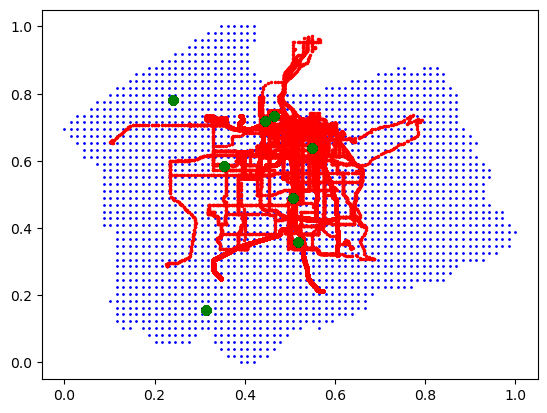

In [43]:
plt.plot(grid_crds['normalized_lon'], grid_crds['normalized_lat'], 'bo', markersize=1)
plt.plot(mobile['normalized_lon'], mobile['normalized_lat'], 'ro', markersize = 1.5)
plt.plot(aq_df['normalized_lon'], aq_df['normalized_lat'], 'go')
plt.show()

## Standardizing time

In [46]:
mobile['times'] = pd.to_datetime(mobile['times'])

day_time = mobile['times'].astype('int64') / 1e9 ## Time in nanoseconds
mobile['normalized_time'] = (day_time - min_t) / (max_t-min_t)
mobile['normalized_time']

430124     0.000130
430125     0.000132
430126     0.000134
430127     0.000135
430128     0.000137
             ...   
8384588    1.002629
8384589    1.002631
8384590    1.002631
8384591    1.002633
8384592    1.002633
Name: normalized_time, Length: 1881454, dtype: float64

## Basis functions

In [47]:
# time basis
num_basis = [10, 20, 56] # 3 layers with n knots per layer
std_arr = [0.3, 0.15, 0.05] # sd for gaussian function

mu_knots = [np.linspace(0,1,int(i)) for i in num_basis]

mu_knots # ragged array

[array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
 array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
        0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
        0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
        0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
 array([0.        , 0.01818182, 0.03636364, 0.05454545, 0.07272727,
        0.09090909, 0.10909091, 0.12727273, 0.14545455, 0.16363636,
        0.18181818, 0.2       , 0.21818182, 0.23636364, 0.25454545,
        0.27272727, 0.29090909, 0.30909091, 0.32727273, 0.34545455,
        0.36363636, 0.38181818, 0.4       , 0.41818182, 0.43636364,
        0.45454545, 0.47272727, 0.49090909, 0.50909091, 0.52727273,
        0.54545455, 0.56363636, 0.58181818, 0.6       , 0.61818182,
        0.63636364, 0.65454545, 0.67272727, 0.69090909, 0.70909091,
        0.72727273, 0.74545455, 0.76363636, 

In [48]:
s = np.array(aq_df['normalized_time']).reshape(len(aq_df),1)
print(s.shape)
N_data = len(aq_df)
N = N_data ## We have a separate N for the training + test data set (no testing at present)
print(N)

(69095, 1)
69095


In [49]:
phi_t1 = np.zeros((N, sum(num_basis)))
K = 0
for res in range(len(num_basis)): # loop through each basis layer
    std = std_arr[res]
    for i in range(num_basis[res]): # loop through each knot in the layer
        d = np.square(np.absolute(s - mu_knots[res][i])) # distance from each obs in s to knot
        for j in range(len(d)): # estimate gaussian weight
            if d[j] >= 0 and d[j] <= 1:
                phi_t1[j,i + K] = np.exp(-0.5 * d[j]/(std**2))
            else:
                phi_t1[j,i + K] = 0
    K = K + num_basis[res]

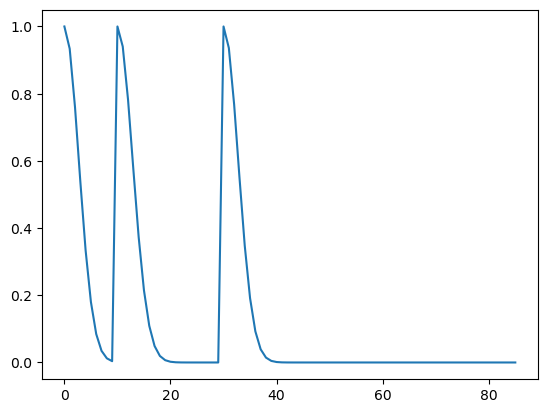

In [50]:
plt.plot(phi_t1[0,:])

## mobile data

In [51]:
s = np.array(mobile['normalized_time']).reshape(len(mobile),1)
print(s.shape)
N_data = len(mobile)
N = N_data ## We have a separate N for the training + test data set (no testing at present)
print(N)

(1881454, 1)
1881454


In [52]:
phi_t2 = np.zeros((N, sum(num_basis)))
K = 0
for res in range(len(num_basis)): # loop through each basis layer
    std = std_arr[res]
    for i in range(num_basis[res]): # loop through each knot in the layer
        d = np.square(np.absolute(s - mu_knots[res][i])) # distance from each obs in s to knot
        for j in range(len(d)): # estimate gaussian weight
            if d[j] >= 0 and d[j] <= 1:
                phi_t2[j,i + K] = np.exp(-0.5 * d[j]/(std**2))
            else:
                phi_t2[j,i + K] = 0
    K = K + num_basis[res]

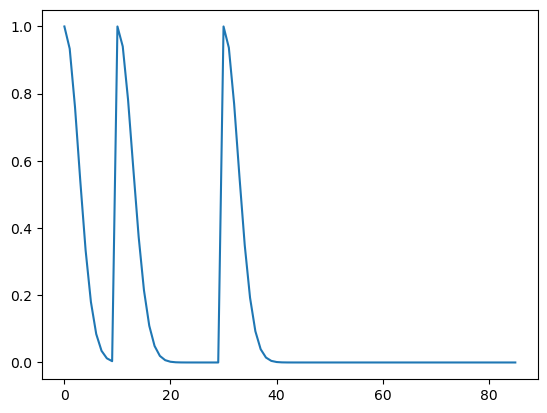

In [53]:
plt.plot(phi_t2[0,:])

In [54]:
# space basis

## Knots for spatial dimension (from STDK example)
num_basis = [5**2,9**2,11**2]
knots_1d = [np.linspace(0,1,int(np.sqrt(i))) for i in num_basis]

knots_1d

[array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 array([0.   , 0.125, 0.25 , 0.375, 0.5  , 0.625, 0.75 , 0.875, 1.   ]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])]

## monitor data

In [55]:
## Make array of coordinates
s = np.vstack((aq_df['normalized_lon'],aq_df['normalized_lat'])).T
N = len(aq_df)

In [56]:
## Get weights from Wendland kernel
K = 0
phi_s1 = np.zeros((N, sum(num_basis)))
for res in range(len(num_basis)):
    theta = 1/np.sqrt(num_basis[res])*2.5
    knots_s1, knots_s2 = np.meshgrid(knots_1d[res],knots_1d[res])
    knots = np.column_stack((knots_s1.flatten(),knots_s2.flatten()))
    for i in range(num_basis[res]):
        d = np.linalg.norm(s-knots[i,:],axis=1)/theta
        for j in range(len(d)):
            if d[j] >= 0 and d[j] <= 1:
                phi_s1[j,i + K] = (1-d[j])**6 * (35 * d[j]**2 + 18 * d[j] + 3)/3
            else:
                phi_s1[j,i + K] = 0
    K = K + num_basis[res]

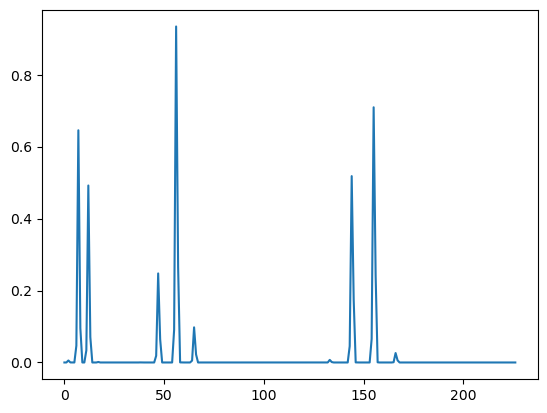

In [57]:
plt.plot(phi_s1[0,:]) # basis function for first location

In [58]:
x = phi_s1[0,0:25]
x = x.reshape(5, 5)

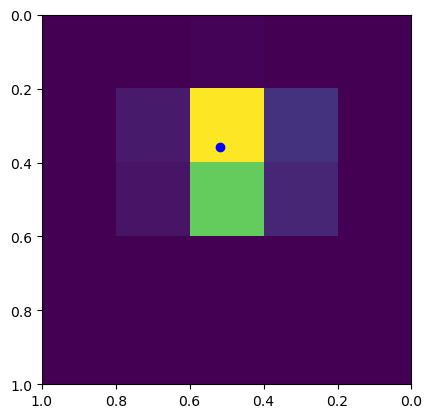

In [59]:
plt.imshow(x, extent=[1, 0, 1, 0])
plt.plot(aq_df['normalized_lon'].iloc[0], aq_df['normalized_lat'].iloc[0], 'bo')
plt.show()

In [60]:
num_basis

[25, 81, 121]

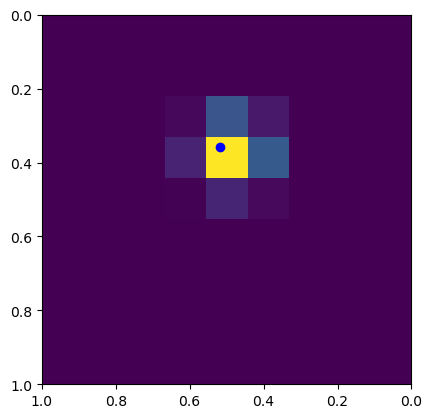

In [61]:
x = phi_s1[0,25:106]
x = x.reshape(9, 9)
plt.imshow(x, extent=[1, 0, 1, 0])
plt.plot(aq_df['normalized_lon'].iloc[0], aq_df['normalized_lat'].iloc[0], 'bo')
plt.show()


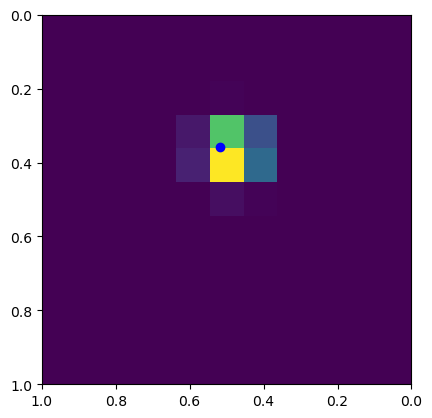

In [63]:
x = phi_s1[0,106:227]
x = x.reshape(11, 11)
plt.imshow(x, extent=[1, 0, 1, 0])
plt.plot(aq_df['normalized_lon'].iloc[0], aq_df['normalized_lat'].iloc[0], 'bo')
plt.show()


## mobile data

In [64]:
## Make array of coordinates
s = np.vstack((mobile['normalized_lon'],mobile['normalized_lat'])).T
N = len(mobile)

In [65]:
## Get weights from Wendland kernel
K = 0
phi_s2 = np.zeros((N, sum(num_basis)))
for res in range(len(num_basis)):
    theta = 1/np.sqrt(num_basis[res])*2.5
    knots_s1, knots_s2 = np.meshgrid(knots_1d[res],knots_1d[res])
    knots = np.column_stack((knots_s1.flatten(),knots_s2.flatten()))
    for i in range(num_basis[res]):
        d = np.linalg.norm(s-knots[i,:],axis=1)/theta
        for j in range(len(d)):
            if d[j] >= 0 and d[j] <= 1:
                phi_s2[j,i + K] = (1-d[j])**6 * (35 * d[j]**2 + 18 * d[j] + 3)/3
            else:
                phi_s2[j,i + K] = 0
    K = K + num_basis[res]

## output: cleaning and storing

In [66]:
# monitors

print(phi_t1.shape)
print(phi_s1.shape)

phi_1 = np.hstack((phi_t1,phi_s1)) # bind columns

(69095, 86)
(69095, 227)


In [67]:
idx_zero = np.array([], dtype=int)
for i in range(phi_1.shape[1]):
    if sum(phi_1[:,i]!=0)==0:
        idx_zero = np.append(idx_zero,int(i)) # remove 0s (basis not linked to obs)

phi_1_reduce = np.delete(phi_1,idx_zero,1)
print(phi_1.shape)
print(phi_1_reduce.shape)

(69095, 313)
(69095, 217)


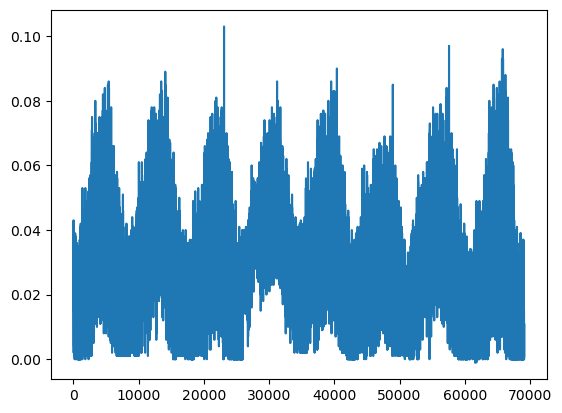

In [68]:
y = np.array(aq_df["sample.measurement"])
df_y = pd.DataFrame(y)
plt.plot(y) # note pm25 has more extremes than ozone; may be weekends in July? 

In [69]:
df = pd.DataFrame(phi_1)
df['y'] = df_y[0]
df['site'] = aq_df['site.num'].to_numpy()
df['date'] = aq_df['date'].to_numpy()
df['normalized_time'] = aq_df['normalized_time'].to_numpy()
df.to_csv("rbfs/phi_1_o3_full.csv")
df = pd.DataFrame(phi_1_reduce)
df['y'] = df_y[0]
df['site'] = aq_df['site.num'].to_numpy()
df['date'] = aq_df['date'].to_numpy()
df['normalized_time'] = aq_df['normalized_time'].to_numpy()
df.to_csv("rbfs/phi_1_o3_reduce_v2.csv")

In [71]:
# mobile

print(phi_t2.shape)
print(phi_s2.shape)

phi_2 = np.hstack((phi_t2, phi_s2))

(1881454, 86)
(1881454, 227)


In [72]:
idx_zero = np.array([], dtype=int)
for i in range(phi_2.shape[1]):
    if sum(phi_2[:,i]!=0)==0:
        idx_zero = np.append(idx_zero,int(i))

phi_2_reduce = np.delete(phi_2,idx_zero,1)
print(phi_2.shape)
print(phi_2_reduce.shape)

(1881454, 313)
(1881454, 269)


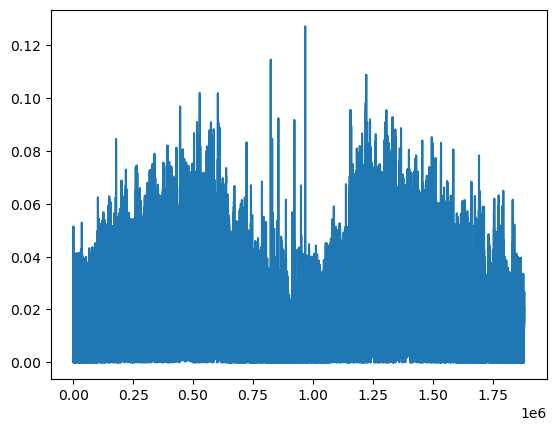

In [73]:
y = np.array(mobile["val"])
df_y = pd.DataFrame(y)
plt.plot(y)

In [74]:
mobile

,times,LAT,LON,ELV,O3F,ebus_trax,val,normalized_lon,normalized_lat,normalized_time
430124,2023-01-01 01:08:00,40.76577,-111.90970,1292.6,0,ebus,0.0197,0.495754,0.696469,0.000130
430125,2023-01-01 01:09:00,40.76576,-111.90970,1292.6,0,ebus,0.0235,0.495754,0.696449,0.000132
430126,2023-01-01 01:10:00,40.76575,-111.90960,1292.2,0,ebus,0.0216,0.495897,0.696428,0.000134
430127,2023-01-01 01:11:00,40.76574,-111.90973,1292.1,0,ebus,0.0204,0.495711,0.696408,0.000135
430128,2023-01-01 01:12:00,40.76569,-111.90975,1292.0,0,ebus,0.0186,0.495682,0.696308,0.000137
...,...,...,...,...,...,...,...,...,...,...
8384588,2023-12-31 22:58:00,40.72190,-111.92030,1287.5,0,trax,0.0218,0.480542,0.608284,1.002629
8384589,2023-12-31 22:59:00,40.72190,-111.92031,1287.5,0,trax,0.0226,0.480528,0.608284,1.002631
8384590,2023-12-31 22:59:00,40.62766,-111.90572,1314.6,0,trax,0.0256,0.501465,0.418847,1.002631
8384591,2023-12-31 23:00:00,40.72190,-111.92031,1287.4,0,trax,0.0204,0.480528,0.608284,1.002633


In [76]:
df = pd.DataFrame(phi_2)
df['y'] = df_y[0]
df['date'] = mobile['times'].to_numpy()
df['normalized_time'] = mobile['normalized_time'].to_numpy()
df.to_csv("rbfs/phi_2_o3_full.csv")
df = pd.DataFrame(phi_2_reduce)
df['y'] = df_y[0]
df['date'] = mobile['times'].to_numpy()
df['normalized_time'] = mobile['normalized_time'].to_numpy()
df.to_csv("rbfs/phi_2_o3_reduce.csv")

In [78]:
df['lat'] = mobile['LAT'].to_numpy()
df['lon'] = mobile['LON'].to_numpy()
df.to_csv("rbfs/phi_2_o3_reduce_crds.csv")

In [79]:
df.shape

(1881454, 274)

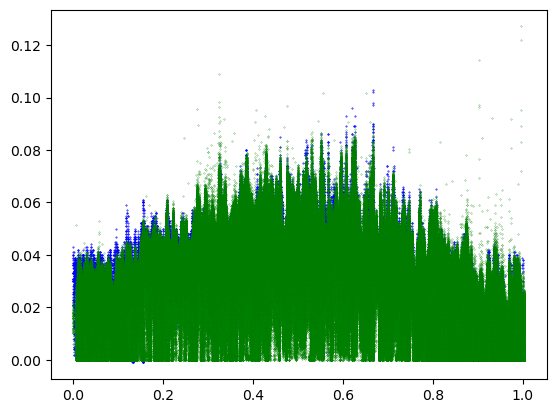

In [80]:
df3 = df[df['y'] < 40] 
aq_df3 = aq_df[aq_df['sample.measurement'] < 40]

plt.plot(aq_df['normalized_time'], aq_df['sample.measurement'], 'bo', markersize = 0.4)
plt.plot(df['normalized_time'], df['y'], 'go', markersize = 0.2)